In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:\DESKTOP\Pattern recognition\Logistic_Regresion_on_diabetesDataset\diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
normalized_dataset = (data - data.min()) / (data.max() - data.min())


In [5]:
# Split dataset into features and target
X = normalized_dataset.drop('Outcome', axis=1).values
y = normalized_dataset['Outcome'].values.reshape(-1, 1)

In [6]:
def train_val_test_split(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    assert train_ratio + val_ratio + test_ratio == 1, "Ratios should sum up to 1"
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_state)
    remaining_ratio = 1 - test_ratio
    train_val_ratio = train_ratio / remaining_ratio
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(val_ratio / remaining_ratio), random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 1-train_ratio-val_ratio

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.2, test_ratio=1-train_ratio-val_ratio)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 537
Validation size: 154
Test size: 77


In [7]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, gradient_descent='batch'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history_train = []
        self.cost_history_val = []
        self.gradient_descent = gradient_descent
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val, y_val):
        # Initialize parameters
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        
        # Gradient Descent
        for i in range(self.num_iterations):
            if self.gradient_descent == 'batch':
                # Batch Gradient Descent
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(X.T, (h - y)) / m
                self.theta -= self.learning_rate * gradient
                
            elif self.gradient_descent == 'stochastic':
                # Stochastic Gradient Descent
                for j in range(m):
                    rand_index = np.random.randint(0, m)
                    X_single = X[rand_index, :].reshape(1, -1)
                    y_single = y[rand_index].reshape(1, -1)
                    z = np.dot(X_single, self.theta)
                    h = self.sigmoid(z)
                    gradient = np.dot(X_single.T, (h - y_single))
                    self.theta -= self.learning_rate * gradient
            
            # Compute and store cost for training set
            cost_train = self.compute_cost(X, y)
            self.cost_history_train.append(cost_train)
            
            # Compute and store cost for validation set
            cost_val = self.compute_cost(X_val, y_val)
            self.cost_history_val.append(cost_val)
        
    def compute_cost(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        epsilon = 1e-5  # to avoid log(0) which is undefined
        cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.theta)
        probabilities = self.sigmoid(z)
        predictions = (probabilities >= threshold).astype(int)
        return predictions


In [8]:
# Train the model using Batch Gradient Descent
log_reg_batch = LogisticRegression(learning_rate=0.01, num_iterations=1000, gradient_descent='batch')
log_reg_batch.fit(X_train, y_train, X_val, y_val)
print("BGD completed")
# Train the model using Stochastic Gradient Descent
log_reg_stochastic = LogisticRegression(learning_rate=0.01, num_iterations=1000, gradient_descent='stochastic')
log_reg_stochastic.fit(X_train, y_train, X_val, y_val)
print("SGD completed")

BGD completed


SGD completed


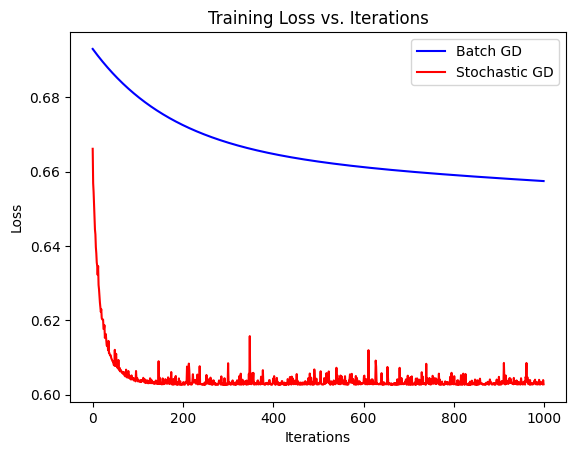

In [9]:
plt.plot(range(log_reg_batch.num_iterations), log_reg_batch.cost_history_train, label='Batch GD', color='blue')
plt.plot(range(log_reg_stochastic.num_iterations), log_reg_stochastic.cost_history_train, label='Stochastic GD', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iterations')
plt.legend()
plt.show()

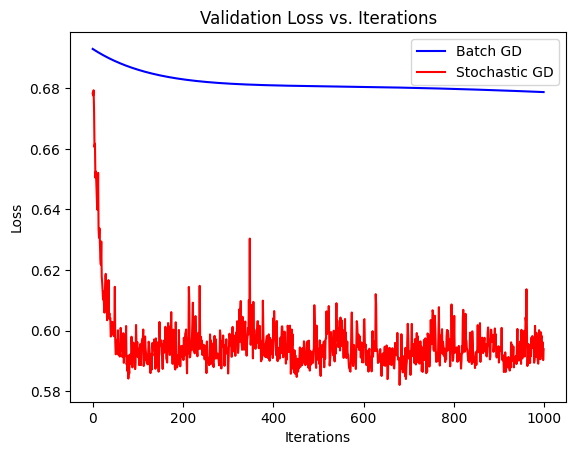

In [10]:
plt.plot(range(log_reg_batch.num_iterations), log_reg_batch.cost_history_val, label='Batch GD', color='blue')
plt.plot(range(log_reg_stochastic.num_iterations), log_reg_stochastic.cost_history_val, label='Stochastic GD', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iterations')
plt.legend()
plt.show()

In [11]:
# Re-Running on different learning rates
learning_rates = [0.01, 0.0001, 10]

# Initialize lists to store trained models
log_reg_models = []

# Train models for different learning rates
for lr in learning_rates:
    log_reg = LogisticRegression(learning_rate=lr, num_iterations=1000)
    log_reg.fit(X_train, y_train, X_val, y_val)
    log_reg_models.append(log_reg)


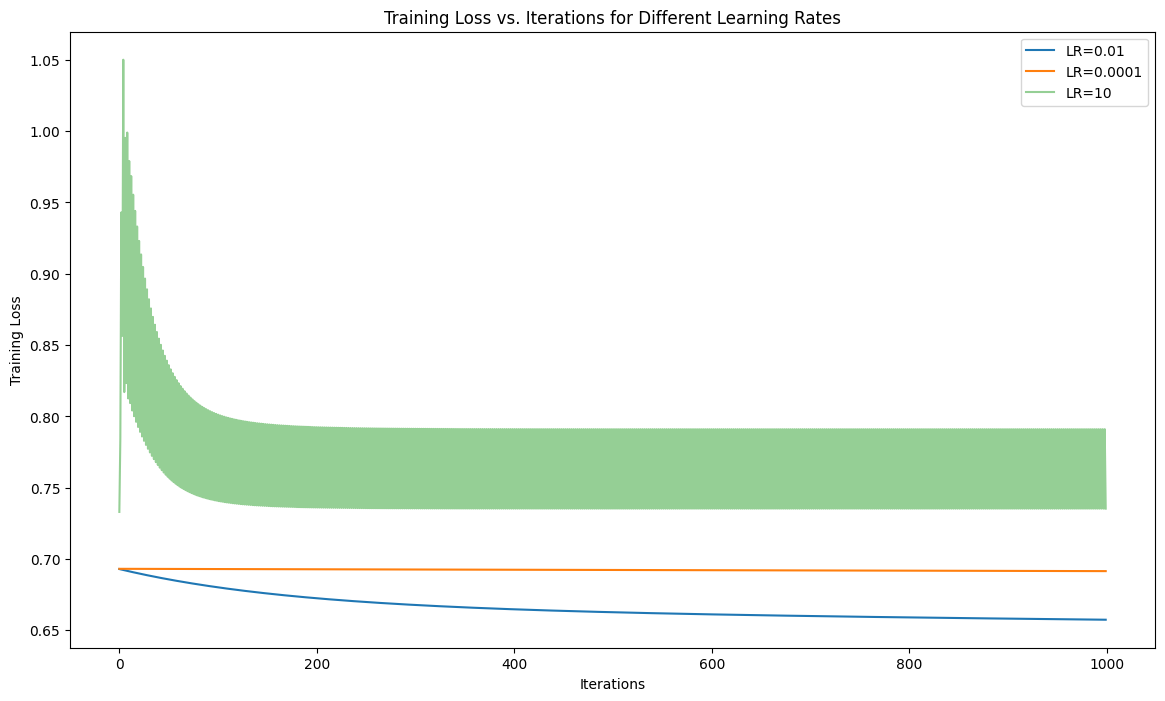

In [12]:
# Plot training loss vs. iterations for each learning rate
plt.figure(figsize=(14, 8))
for i, lr in enumerate(learning_rates):
    if lr == 10:
        plt.plot(range(log_reg_models[i].num_iterations), log_reg_models[i].cost_history_train, label=f'LR={lr}', alpha=0.5)
    else:
        plt.plot(range(log_reg_models[i].num_iterations), log_reg_models[i].cost_history_train, label=f'LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()


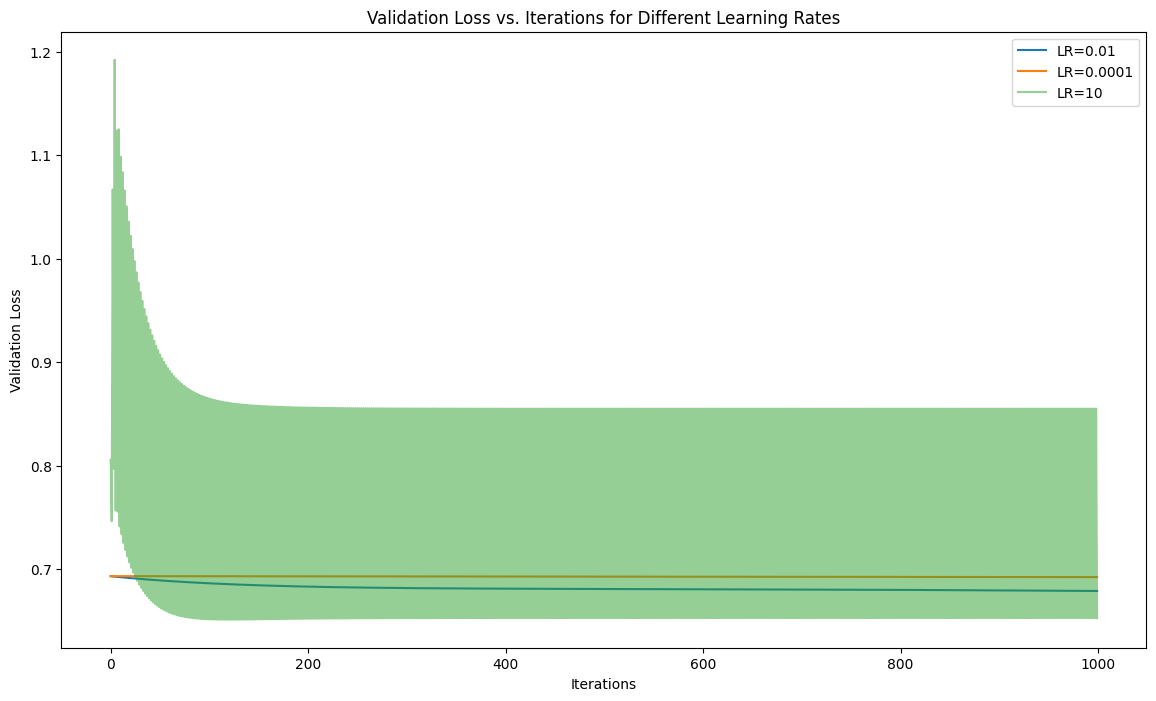

In [13]:
# Plot validation loss vs. iterations for each learning rate
plt.figure(figsize=(14, 8))
for i, lr in enumerate(learning_rates):
    if lr == 10:
        plt.plot(range(log_reg_models[i].num_iterations), log_reg_models[i].cost_history_val, label=f'LR={lr}', alpha=0.5)
    else:
        plt.plot(range(log_reg_models[i].num_iterations), log_reg_models[i].cost_history_val, label=f'LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()

In [14]:
class MetricsCalculator:
    @staticmethod
    def confusion_matrix(actual, predicted):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(actual)):
            if actual[i] == 1 and predicted[i] == 1:
                tp += 1
            elif actual[i] == 0 and predicted[i] == 1:
                fp += 1
            elif actual[i] == 0 and predicted[i] == 0:
                tn += 1
            elif actual[i] == 1 and predicted[i] == 0:
                fn += 1
        return tp, fp, tn, fn

    @staticmethod
    def accuracy(tp, fp, tn, fn):
        total = tp + fp + tn + fn
        correct = tp + tn
        return correct / total

    @staticmethod
    def precision(tp, fp):
        return tp / (tp + fp) if tp + fp != 0 else 0

    @staticmethod
    def recall(tp, fn):
        return tp / (tp + fn) if tp + fn != 0 else 0

    @staticmethod
    def f1_score(precision, recall):
        return 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0


In [15]:
y_pred_test = log_reg.predict(X_test)

# Calculate confusion matrix
tp, fp, tn, fn = MetricsCalculator.confusion_matrix(y_test.flatten(), y_pred_test.flatten())


In [16]:
accuracy = MetricsCalculator.accuracy(tp, fp, tn, fn)
precision = MetricsCalculator.precision(tp, fp)
recall = MetricsCalculator.recall(tp, fn)
f1_score = MetricsCalculator.f1_score(precision, recall)

In [17]:
print("Confusion Matrix:")
print("True Positive:", tp)
print("False Positive:", fp)
print("True Negative:", tn)
print("False Negative:", fn)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Confusion Matrix:
True Positive: 22
False Positive: 30
True Negative: 20
False Negative: 5

Accuracy: 0.5454545454545454
Precision: 0.4230769230769231
Recall: 0.8148148148148148
F1 Score: 0.5569620253164557


In [18]:
def calculate_probabilities(X, theta):
    z = np.dot(X, theta)
    probabilities = 1 / (1 + np.exp(-z))
    return probabilities


In [19]:
y_probabilities = calculate_probabilities(X_test, log_reg.theta)

# Define a function to make predictions based on a threshold
def predict_with_threshold(probabilities, threshold):
    return (probabilities >= threshold).astype(int)

# Define thresholds to evaluate
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Calculate metrics for each threshold
metrics_for_thresholds = {}
for threshold in thresholds:
    y_pred = predict_with_threshold(y_probabilities, threshold)
    tp, fp, tn, fn = MetricsCalculator.confusion_matrix(y_test.flatten(), y_pred.flatten())
    precision = MetricsCalculator.precision(tp, fp)
    recall = MetricsCalculator.recall(tp, fn)
    f1_score = MetricsCalculator.f1_score(precision, recall)
    metrics_for_thresholds[threshold] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}


In [20]:
print("Metrics for Different Thresholds:")
for threshold, metrics in metrics_for_thresholds.items():
    print(f"Threshold: {threshold}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print()

Metrics for Different Thresholds:
Threshold: 0.3
Precision: 0.3424657534246575
Recall: 0.9259259259259259
F1 Score: 0.5

Threshold: 0.4
Precision: 0.39344262295081966
Recall: 0.8888888888888888
F1 Score: 0.5454545454545455

Threshold: 0.5
Precision: 0.4230769230769231
Recall: 0.8148148148148148
F1 Score: 0.5569620253164557

Threshold: 0.6
Precision: 0.4782608695652174
Recall: 0.8148148148148148
F1 Score: 0.6027397260273973

Threshold: 0.7
Precision: 0.4864864864864865
Recall: 0.6666666666666666
F1 Score: 0.5625



In [21]:
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy

In [22]:
accuracies_for_thresholds = {}
for threshold in thresholds:
    y_pred = predict_with_threshold(y_probabilities, threshold)
    accuracy = calculate_accuracy(y_test.flatten(), y_pred.flatten())
    accuracies_for_thresholds[threshold] = accuracy

# Print accuracy for each threshold
print("Accuracy for Different Thresholds:")
for threshold, accuracy in accuracies_for_thresholds.items():
    print(f"Threshold: {threshold}, Accuracy: {accuracy}")

Accuracy for Different Thresholds:
Threshold: 0.3, Accuracy: 0.35064935064935066
Threshold: 0.4, Accuracy: 0.4805194805194805
Threshold: 0.5, Accuracy: 0.5454545454545454
Threshold: 0.6, Accuracy: 0.6233766233766234
Threshold: 0.7, Accuracy: 0.6363636363636364


In [23]:
#Sklearn Logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression


In [24]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse regularization strength (smaller values specify stronger regularization)
    'max_iter': [1000]  # Maximum number of iterations for optimization
}

# Create Logistic Regression model
sklearn_log_reg = SklearnLogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(sklearn_log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000]},
             scoring='accuracy')

In [25]:
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to train the model
best_lr = grid_search.best_params_['C']
best_epochs = grid_search.best_params_['max_iter']
sklearn_log_reg_best = SklearnLogisticRegression(C=best_lr, max_iter=best_epochs)
sklearn_log_reg_best.fit(X_train, y_train)

Best Parameters: {'C': 100, 'max_iter': 1000}


LogisticRegression(C=100, max_iter=1000)

In [26]:
y_probabilities_sklearn = sklearn_log_reg_best.predict_proba(X_test)[:, 1]

# Calculate metrics for Sklearn's implementation
y_pred_sklearn = sklearn_log_reg_best.predict(X_test)
tp_sklearn, fp_sklearn, tn_sklearn, fn_sklearn = MetricsCalculator.confusion_matrix(y_test.flatten(), y_pred_sklearn.flatten())
accuracy_sklearn = MetricsCalculator.accuracy(tp_sklearn, fp_sklearn, tn_sklearn, fn_sklearn)
precision_sklearn = MetricsCalculator.precision(tp_sklearn, fp_sklearn)
recall_sklearn = MetricsCalculator.recall(tp_sklearn, fn_sklearn)
f1_score_sklearn = MetricsCalculator.f1_score(precision_sklearn, recall_sklearn)

# Print metrics for Sklearn's implementation
print("Metrics for Sklearn's Implementation:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_score_sklearn)

Metrics for Sklearn's Implementation:
Accuracy: 0.7012987012987013
Precision: 0.5666666666666667
Recall: 0.6296296296296297
F1 Score: 0.5964912280701755


In [27]:
log_reg.fit(X_train, y_train, X_val, y_val)
loss_history_custom_train = log_reg.cost_history_train
loss_history_custom_val = log_reg.cost_history_val

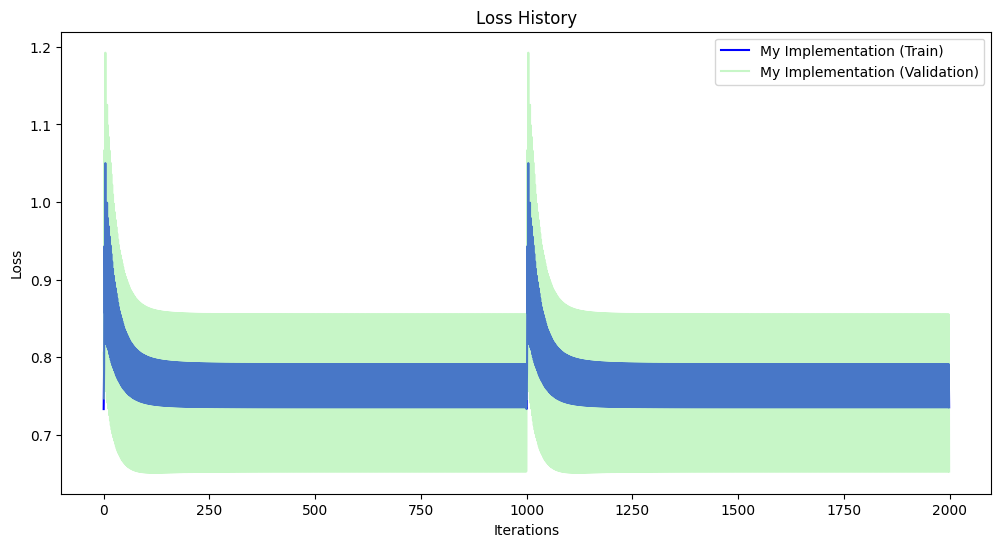

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history_custom_train)), loss_history_custom_train, label='My Implementation (Train)', color='blue')
plt.plot(range(len(loss_history_custom_val)), loss_history_custom_val, label='My Implementation (Validation)', color='lightgreen', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()


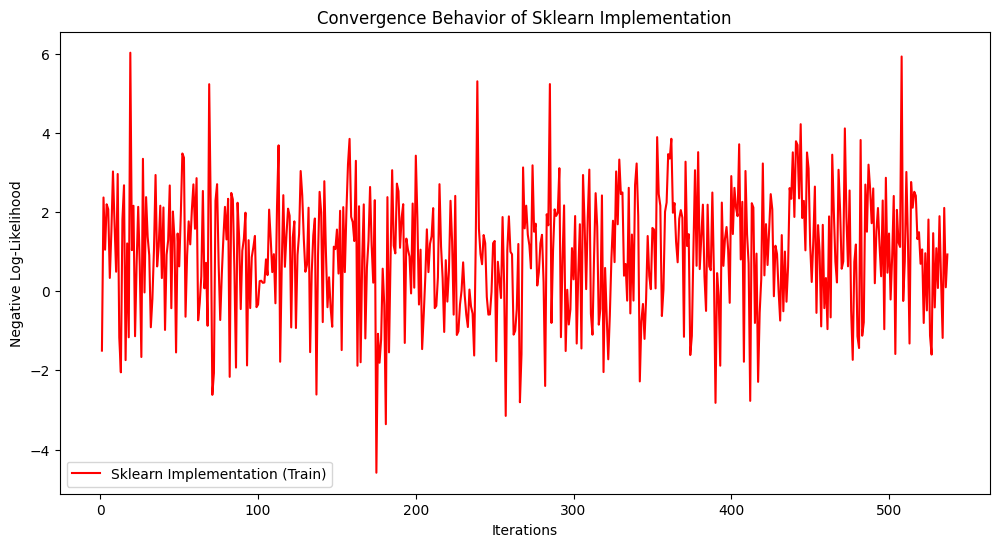

In [29]:
sklearn_log_reg_best.fit(X_train, y_train)

# Calculate the negative log-likelihood values for each iteration
neg_log_likelihood = -sklearn_log_reg_best.decision_function(X_train)

# Plot the negative log-likelihood over iterations
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(neg_log_likelihood) + 1), neg_log_likelihood, label='Sklearn Implementation (Train)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Negative Log-Likelihood')
plt.title('Convergence Behavior of Sklearn Implementation')
plt.legend()
plt.show()

In [30]:
y_pred_custom_train = log_reg.predict(X_train)
y_pred_custom_test = log_reg.predict(X_test)

tp_custom_train, fp_custom_train, tn_custom_train, fn_custom_train = MetricsCalculator.confusion_matrix(y_train.flatten(), y_pred_custom_train.flatten())
tp_custom_test, fp_custom_test, tn_custom_test, fn_custom_test = MetricsCalculator.confusion_matrix(y_test.flatten(), y_pred_custom_test.flatten())

accuracy_custom_train = MetricsCalculator.accuracy(tp_custom_train, fp_custom_train, tn_custom_train, fn_custom_train)
precision_custom_train = MetricsCalculator.precision(tp_custom_train, fp_custom_train)
recall_custom_train = MetricsCalculator.recall(tp_custom_train, fn_custom_train)
f1_score_custom_train = MetricsCalculator.f1_score(precision_custom_train, recall_custom_train)

accuracy_custom_test = MetricsCalculator.accuracy(tp_custom_test, fp_custom_test, tn_custom_test, fn_custom_test)
precision_custom_test = MetricsCalculator.precision(tp_custom_test, fp_custom_test)
recall_custom_test = MetricsCalculator.recall(tp_custom_test, fn_custom_test)
f1_score_custom_test = MetricsCalculator.f1_score(precision_custom_test, recall_custom_test)


In [31]:
print("Performance Metrics for MY Implementation:")
print("Train Accuracy:", accuracy_custom_train)
print("Train Precision:", precision_custom_train)
print("Train Recall:", recall_custom_train)
print("Train F1 Score:", f1_score_custom_train)
print()
print("Test Accuracy:", accuracy_custom_test)
print("Test Precision:", precision_custom_test)
print("Test Recall:", recall_custom_test)
print("Test F1 Score:", f1_score_custom_test)
print()

# Print metrics for Sklearn's implementation
print("Performance Metrics for Sklearn's Implementation:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_score_sklearn)

Performance Metrics for MY Implementation:
Train Accuracy: 0.62756052141527
Train Precision: 0.47337278106508873
Train Recall: 0.8791208791208791
Train F1 Score: 0.6153846153846153

Test Accuracy: 0.5454545454545454
Test Precision: 0.4230769230769231
Test Recall: 0.8148148148148148
Test F1 Score: 0.5569620253164557

Performance Metrics for Sklearn's Implementation:
Accuracy: 0.7012987012987013
Precision: 0.5666666666666667
Recall: 0.6296296296296297
F1 Score: 0.5964912280701755
